# Wavenet analysis

This notebook shows how to load and run a trained WaveNet and inverse WaveNet using the `analysis.py` helper module.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from analysis import load_model, load_testdataset

## Forward

In [2]:
# Load model and dataset
tf.reset_default_graph()
model, c_dict, input_features, sess = load_model("new_forward_final", verbose=False)
d = load_testdataset("layers_2ms_validate.bin", N_EXAMPLES=1000, c_dict=c_dict, verbose=False)
#for k in c_dict: print("%s: %s"%(k, c_dict[k]))

Loading model from: server/models/new_forward_final/model.ckpt-500000




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from server/models/new_forward_final/model.ckpt-500000


In [3]:
# Get batches of test data
velocity_array, reflectivity_array, gather_array = d[42,7,8,9]
print(velocity_array.shape, reflectivity_array.shape, gather_array.shape)

(4, 114, 1) (4, 512, 1) (4, 512, 11)


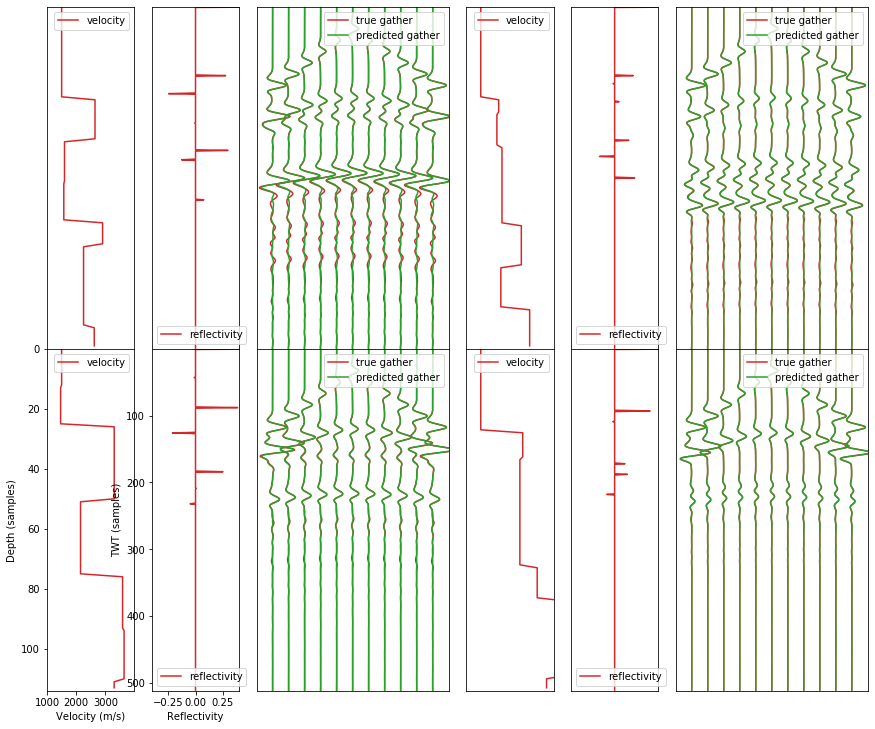

In [4]:
# Inference
gather_prediction_array = sess.run(model.y, feed_dict={input_features["reflectivity"]: reflectivity_array})
model._plot_results(reflectivity_array,
                    gather_prediction_array,
                    gather_array,
                    velocity_array)
plt.show()

## Inverse

In [5]:
# Load model and dataset
tf.reset_default_graph()
model, c_dict, input_features, sess = load_model("new_inverse_final", verbose=False)
d = load_testdataset("layers_2ms_validate.bin", N_EXAMPLES=1000, c_dict=c_dict, verbose=False)
#for k in c_dict: print("%s: %s"%(k, c_dict[k]))

Loading model from: server/models/new_inverse_final/model.ckpt-500000
INFO:tensorflow:Restoring parameters from server/models/new_inverse_final/model.ckpt-500000


In [6]:
# Get batches of test data
velocity_array, reflectivity_array, gather_array = d[42,7,8,9]
print(velocity_array.shape, reflectivity_array.shape, gather_array.shape)

(4, 114, 1) (4, 512, 1) (4, 512, 11)


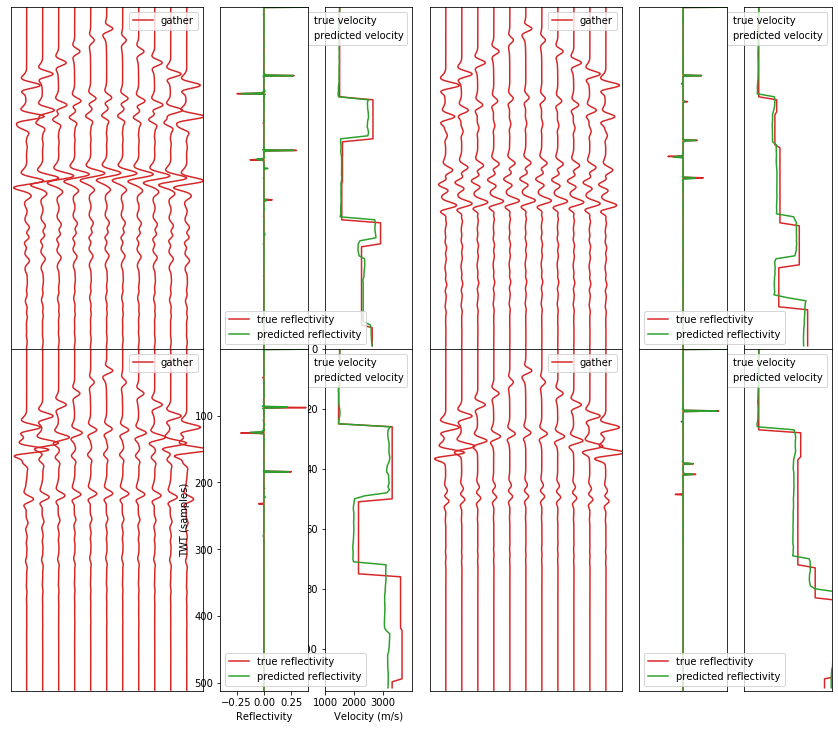

In [7]:
# Inference
reflectivity_prediction_array = sess.run(model.y, feed_dict={input_features["gather"]: gather_array})
model._plot_results(gather_array,
                    reflectivity_prediction_array,
                    reflectivity_array,
                    velocity_array)
plt.show()